In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Importação do Datasets

In [2]:
# Importação dos Dados 

arquivo_01 = 'dataset_model.csv'

raw_data = pd.read_csv(arquivo_01, index_col = 'Unnamed: 0')

In [3]:
raw_data.head()

,family,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-quality,...,blue/bright/varn/clean,shape,thick,width,len,bore,recozimento,thick_q,width_q,len_q
0,?,A,8,0,?,S,?,0,?,G,...,?,COIL,0.7,610.0,0.0,0,ruim,grupo_thick_02,grupo_width_02,grupo_len_01
1,?,R,0,0,?,S,2.0,0,?,E,...,?,SHEET,0.7,1300.0,762.0,0,ruim,grupo_thick_02,grupo_width_03,grupo_len_02
2,?,R,0,0,?,S,2.0,0,?,E,...,?,SHEET,0.7,1300.0,762.0,0,ruim,grupo_thick_02,grupo_width_03,grupo_len_02
3,?,R,0,0,?,S,2.0,0,?,E,...,?,SHEET,0.7,1300.0,762.0,0,ruim,grupo_thick_02,grupo_width_03,grupo_len_02
4,?,R,0,0,?,S,2.0,0,?,E,...,?,SHEET,0.7,1300.0,762.0,0,ruim,grupo_thick_02,grupo_width_03,grupo_len_02


Considerando as etapas anteriores de descoberta e analise dos dados, este notebook irá focar apenas nas atividades relacionadas com a criação do modelo.
Não repetiremos nenhuma das analises feitas anterioremente.

## 01 - Pré Processamento

Conforme documentação, todos os valores ? podem ser considerados categoricos. Assim trataremos o produto possuindo a feature com o valor '1' e não possuindo a feature com o valor '0'

In [4]:
df_processamento = raw_data

### 01.1 - Dados Qualitativos

In [5]:
plan_map = {'?' : 0}

df_processamento = df_processamento.replace(plan_map)

df_processamento.head()

,family,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,surface-quality,...,blue/bright/varn/clean,shape,thick,width,len,bore,recozimento,thick_q,width_q,len_q
0,0,A,8,0,0,S,0,0,0,G,...,0,COIL,0.7,610.0,0.0,0,ruim,grupo_thick_02,grupo_width_02,grupo_len_01
1,0,R,0,0,0,S,2.0,0,0,E,...,0,SHEET,0.7,1300.0,762.0,0,ruim,grupo_thick_02,grupo_width_03,grupo_len_02
2,0,R,0,0,0,S,2.0,0,0,E,...,0,SHEET,0.7,1300.0,762.0,0,ruim,grupo_thick_02,grupo_width_03,grupo_len_02
3,0,R,0,0,0,S,2.0,0,0,E,...,0,SHEET,0.7,1300.0,762.0,0,ruim,grupo_thick_02,grupo_width_03,grupo_len_02
4,0,R,0,0,0,S,2.0,0,0,E,...,0,SHEET,0.7,1300.0,762.0,0,ruim,grupo_thick_02,grupo_width_03,grupo_len_02


In [6]:
df_processamento.nunique()

family                     3
steel                      8
carbon                    10
hardness                   7
temper_rolling             2
condition                  3
formability                5
strength                   8
non-ageing                 2
surface-quality            5
bf                         2
bt                         2
bw/me                      3
bl                         2
cbond                      2
ferro                      2
blue/bright/varn/clean     4
shape                      2
thick                     49
width                     67
len                       24
bore                       3
recozimento                3
thick_q                    6
width_q                    3
len_q                      3
dtype: int64

Sera aplicada duas técnicas diferentes para o pré processamento: binarização e OneHotEncoder.
    * Lista de colunas binárias:
    - temper_rolling
    - non-ageing 
    - bf
    - bt
    - bl
    - cbond
    - ferro

In [7]:
# Divisão de colunas preditoras qualitativas de colunas continuas e label

colunas_continuas = ['carbon', 'hardness', 'strength', 'thick', 'width', 'len', 'recozimento']

df_qualitativos = df_processamento.drop(colunas_continuas, axis = 1)

### 01.1.2 - One Hot Encoder

In [8]:
colunas_binarias = ['temper_rolling', 'non-ageing', 'bf', 'bt', 'bl', 'cbond', 'ferro']

df_to_OneHot = df_qualitativos.drop(colunas_binarias, axis = 1)

df_to_OneHot.head()

,family,steel,condition,formability,surface-quality,bw/me,blue/bright/varn/clean,shape,bore,thick_q,width_q,len_q
0,0,A,S,0,G,0,0,COIL,0,grupo_thick_02,grupo_width_02,grupo_len_01
1,0,R,S,2.0,E,B,0,SHEET,0,grupo_thick_02,grupo_width_03,grupo_len_02
2,0,R,S,2.0,E,B,0,SHEET,0,grupo_thick_02,grupo_width_03,grupo_len_02
3,0,R,S,2.0,E,B,0,SHEET,0,grupo_thick_02,grupo_width_03,grupo_len_02
4,0,R,S,2.0,E,B,0,SHEET,0,grupo_thick_02,grupo_width_03,grupo_len_02


In [9]:
df_to_OneHot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1501
Data columns (total 12 columns):
family                    1502 non-null object
steel                     1502 non-null object
condition                 1502 non-null object
formability               1502 non-null object
surface-quality           1502 non-null object
bw/me                     1502 non-null object
blue/bright/varn/clean    1502 non-null object
shape                     1502 non-null object
bore                      1502 non-null int64
thick_q                   1502 non-null object
width_q                   1502 non-null object
len_q                     1502 non-null object
dtypes: int64(1), object(11)
memory usage: 152.5+ KB


In [10]:
df_qualitativos['bore'] = df_qualitativos['bore'].astype('object')

In [11]:
from category_encoders.one_hot import OneHotEncoder

enc = OneHotEncoder(use_cat_names = True, return_df = True)
df_enc = enc.fit_transform(df_to_OneHot)

In [12]:
df_enc.head()

,family_0,family_ZS,family_TN,steel_A,steel_R,steel_K,steel_S,steel_0,steel_W,steel_M,...,thick_q_grupo_thick_04,thick_q_grupo_thick_03,thick_q_grupo_thick_01,thick_q_grupo_thick_05,width_q_grupo_width_02,width_q_grupo_width_03,width_q_grupo_width_01,len_q_grupo_len_01,len_q_grupo_len_02,len_q_grupo_len_03
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [13]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1501
Data columns (total 46 columns):
family_0                    1502 non-null int64
family_ZS                   1502 non-null int64
family_TN                   1502 non-null int64
steel_A                     1502 non-null int64
steel_R                     1502 non-null int64
steel_K                     1502 non-null int64
steel_S                     1502 non-null int64
steel_0                     1502 non-null int64
steel_W                     1502 non-null int64
steel_M                     1502 non-null int64
steel_V                     1502 non-null int64
condition_S                 1502 non-null int64
condition_0                 1502 non-null int64
condition_A                 1502 non-null int64
formability_0               1502 non-null int64
formability_2.0             1502 non-null int64
formability_3.0             1502 non-null int64
formability_5.0             1502 non-null int64
formability_1.0             1

### 01.1.3 - Binarização

In [14]:
colunas_binarias = ['temper_rolling', 'non-ageing', 'bf', 'bt', 'bl', 'cbond', 'ferro']

df_to_Bin = df_qualitativos.loc[ : , colunas_binarias]

df_to_Bin.head()

,temper_rolling,non-ageing,bf,bt,bl,cbond,ferro
0,0,0,0,0,0,0,0
1,0,0,Y,0,0,0,0
2,0,0,Y,0,0,0,0
3,0,0,Y,0,0,0,0
4,0,0,0,0,Y,0,0


In [15]:
df_to_Bin = pd.get_dummies(df_to_Bin, drop_first = True)

In [16]:
df_to_Bin.head()

,temper_rolling_T,non-ageing_N,bf_Y,bt_Y,bl_Y,cbond_Y,ferro_Y
0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0


## 01.1.4 - Merge dos Dataset Qualitativos

In [17]:
df_quali = pd.concat([df_to_Bin,df_enc], axis = 1)
df_quali.head()

,temper_rolling_T,non-ageing_N,bf_Y,bt_Y,bl_Y,cbond_Y,ferro_Y,family_0,family_ZS,family_TN,...,thick_q_grupo_thick_04,thick_q_grupo_thick_03,thick_q_grupo_thick_01,thick_q_grupo_thick_05,width_q_grupo_width_02,width_q_grupo_width_03,width_q_grupo_width_01,len_q_grupo_len_01,len_q_grupo_len_02,len_q_grupo_len_03
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [18]:
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 1501
Data columns (total 53 columns):
temper_rolling_T            1502 non-null uint8
non-ageing_N                1502 non-null uint8
bf_Y                        1502 non-null uint8
bt_Y                        1502 non-null uint8
bl_Y                        1502 non-null uint8
cbond_Y                     1502 non-null uint8
ferro_Y                     1502 non-null uint8
family_0                    1502 non-null int64
family_ZS                   1502 non-null int64
family_TN                   1502 non-null int64
steel_A                     1502 non-null int64
steel_R                     1502 non-null int64
steel_K                     1502 non-null int64
steel_S                     1502 non-null int64
steel_0                     1502 non-null int64
steel_W                     1502 non-null int64
steel_M                     1502 non-null int64
steel_V                     1502 non-null int64
condition_S                 1

## 01.2 - Dados Quantitativos

In [19]:
df_quant = df_processamento.loc[ : , colunas_continuas]
df_quant = df_quant.drop(['recozimento'], axis = 1)

In [20]:
df_quant.head()

,carbon,hardness,strength,thick,width,len
0,8,0,0,0.7,610.0,0.0
1,0,0,0,0.7,1300.0,762.0
2,0,0,0,0.7,1300.0,762.0
3,0,0,0,0.7,1300.0,762.0
4,0,0,0,0.7,1300.0,762.0


## 01.2.1 - Normalização

In [21]:
from sklearn.preprocessing import Normalizer

# Gerando os dados normalizados
scaler = Normalizer().fit_transform(df_quant)

## 01.2.1 - Padronização

In [22]:
from sklearn.preprocessing import StandardScaler

# Gerando os dados padronizados
standard = StandardScaler().fit_transform(scaler)

In [23]:
# Criando um novo dataset normalizado
indice_colunas = list(df_quant.columns[:])

df_quant_norm = pd.DataFrame(standard, columns = indice_colunas)

df_quant_norm.head()

,carbon,hardness,strength,thick,width,len
0,0.519829,-0.198273,-0.18531,-0.078418,0.838495,-0.976183
1,-0.190272,-0.198273,-0.18531,-0.104097,0.434912,0.212622
2,-0.190272,-0.198273,-0.18531,-0.104097,0.434912,0.212622
3,-0.190272,-0.198273,-0.18531,-0.104097,0.434912,0.212622
4,-0.190272,-0.198273,-0.18531,-0.104097,0.434912,0.212622


In [24]:
df_quant_norm.skew()

carbon       8.606587
hardness     8.396674
strength     6.576146
thick       35.168941
width       -0.789168
len          0.214991
dtype: float64

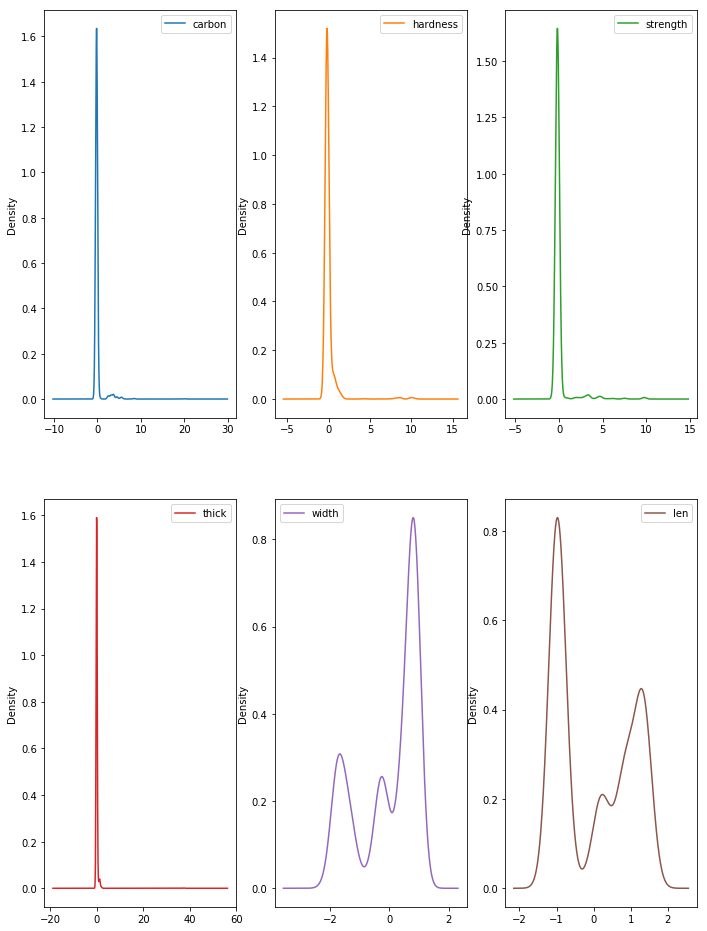

In [25]:
# Density Plots
df_quant_norm.plot(kind = 'density',layout = (2,3), subplots = True,  sharex = False, figsize = (11.7, 16.5));

## 1.3 Merge do Dataset Qualitativo com Dataset Quantitativo

In [26]:
df_pre_processed = pd.concat([df_quali, df_quant_norm], axis = 1)

In [27]:
df_pre_processed['recozimento'] = df_processamento['recozimento']

In [28]:
df_pre_processed.head()

,temper_rolling_T,non-ageing_N,bf_Y,bt_Y,bl_Y,cbond_Y,ferro_Y,family_0,family_ZS,family_TN,...,len_q_grupo_len_01,len_q_grupo_len_02,len_q_grupo_len_03,carbon,hardness,strength,thick,width,len,recozimento
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0.519829,-0.198273,-0.18531,-0.078418,0.838495,-0.976183,ruim
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,-0.190272,-0.198273,-0.18531,-0.104097,0.434912,0.212622,ruim
2,0,0,1,0,0,0,0,1,0,0,...,0,1,0,-0.190272,-0.198273,-0.18531,-0.104097,0.434912,0.212622,ruim
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,-0.190272,-0.198273,-0.18531,-0.104097,0.434912,0.212622,ruim
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,-0.190272,-0.198273,-0.18531,-0.104097,0.434912,0.212622,ruim


# 02 - Feature Engineering